In [4]:
#Downloading the dataset (Skip this part if you are using other environments)

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shanegerami","key":"0c32ffffd343776b8cd094b718ef52a5"}'}

In [2]:
!mkdir -p ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d gpiosenka/good-guysbad-guys-image-data-set

 99% 583M/586M [00:20<00:00, 35.3MB/s]
100% 586M/586M [00:20<00:00, 29.3MB/s]


In [6]:
!unzip /content/good-guysbad-guys-image-data-set.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/unsavory/1223.jpg  
  inflating: train/unsavory/1224.jpg  
  inflating: train/unsavory/1225.jpg  
  inflating: train/unsavory/1226.jpg  
  inflating: train/unsavory/1227.jpg  
  inflating: train/unsavory/1228.jpg  
  inflating: train/unsavory/1229.jpg  
  inflating: train/unsavory/1230.jpg  
  inflating: train/unsavory/1231.jpg  
  inflating: train/unsavory/1232.jpg  
  inflating: train/unsavory/1233.jpg  
  inflating: train/unsavory/1234.jpg  
  inflating: train/unsavory/1235.jpg  
  inflating: train/unsavory/1236.jpg  
  inflating: train/unsavory/1237.jpg  
  inflating: train/unsavory/1238.jpg  
  inflating: train/unsavory/1239.jpg  
  inflating: train/unsavory/1240.jpg  
  inflating: train/unsavory/1241.jpg  
  inflating: train/unsavory/1242.jpg  
  inflating: train/unsavory/1243.jpg  
  inflating: train/unsavory/1244.jpg  
  inflating: train/unsavory/1245.jpg  
  inflating: train/unsavory/1246.jpg  
  inflating: 

In [ ]:
#checking image size

In [ ]:
import os
from PIL import Image

def get_image_size(image_path):
    with Image.open(image_path) as img:
        return img.size

def list_image_sizes(directory_path):
    for filename in os.listdir(directory_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            image_path = os.path.join(directory_path, filename)
            size = get_image_size(image_path)
            print(f"{filename}: {size[0]} x {size[1]} pixels")

if __name__ == "__main__":

    directory_path = '/content/train/savory'

    if os.path.exists(directory_path):
        list_image_sizes(directory_path)
    else:
        print("Directory not found.")


Streaming output truncated to the last 5000 lines.
5299.jpg: 169 x 225 pixels
3427.jpg: 354 x 442 pixels
2327.jpg: 286 x 290 pixels
2252.jpg: 443 x 576 pixels
4859.jpg: 173 x 224 pixels
4107.jpg: 283 x 305 pixels
1675.jpg: 193 x 256 pixels
3713.jpg: 254 x 265 pixels
1848.jpg: 278 x 358 pixels
2923.jpg: 397 x 413 pixels
3656.jpg: 368 x 460 pixels
4077.jpg: 198 x 214 pixels
1628.jpg: 201 x 256 pixels
5232.jpg: 224 x 224 pixels
2404.jpg: 352 x 470 pixels
1775.jpg: 187 x 256 pixels
0603.jpg: 573 x 636 pixels
4109.jpg: 426 x 328 pixels
3937.jpg: 209 x 161 pixels
3452.jpg: 387 x 483 pixels
2040.jpg: 105 x 134 pixels
4423.jpg: 157 x 224 pixels
2622.jpg: 406 x 449 pixels
3021.jpg: 295 x 307 pixels
1676.jpg: 201 x 256 pixels
2030.jpg: 125 x 173 pixels
0506.jpg: 238 x 344 pixels
1705.jpg: 316 x 410 pixels
2482.jpg: 267 x 305 pixels
3055.jpg: 388 x 485 pixels
3601.jpg: 346 x 432 pixels
4076.jpg: 211 x 228 pixels
2834.jpg: 336 x 420 pixels
2282.jpg: 361 x 495 pixels
1014.jpg: 233 x 256 pixels
5229

In [5]:
#displaying sample images

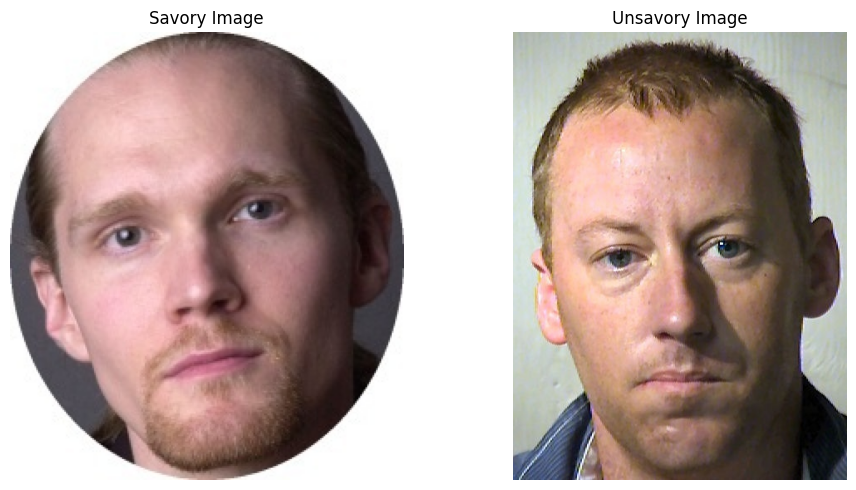

In [7]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Replace 'your_image_directory' with the path to your image directories
savory_path = '/content/train/savory'
unsavory_path = '/content/train/unsavory'

savory_files = [f for f in os.listdir(savory_path)]
savory_image_path = os.path.join(savory_path, savory_files[0])


unsavory_files = [f for f in os.listdir(unsavory_path)]
unsavory_image_path = os.path.join(unsavory_path, unsavory_files[5])

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the savory image on the first subplot
savory_img = mpimg.imread(savory_image_path)
axs[0].imshow(savory_img)
axs[0].axis('off')
axs[0].set_title('Savory Image')

# Plot the unsavory image on the second subplot
unsavory_img = mpimg.imread(unsavory_image_path)
axs[1].imshow(unsavory_img)
axs[1].axis('off')
axs[1].set_title('Unsavory Image')

# Adjust layout to prevent clipping of titles
plt.tight_layout()
plt.show()


In [6]:
#loading and preprocessing step

In [13]:
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
import os

# Define paths
savory_path_train = '/content/train/savory'
unsavory_path_train = '/content/train/unsavory'

savory_path_test = '/content/test/savory'
unsavory_path_test = '/content/test/unsavory'

# Function to load and preprocess images
def load_and_preprocess_image(image_path, target_size=(512, 512)):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize(target_size)
    img = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    return img

# Function to read images and assign labels
def read_images_and_assign_labels(image_folder, class_label):
    image_paths = [os.path.join(image_folder, image_file) for image_file in os.listdir(image_folder)]
    labels = [[1, 0] if class_label == 0 else [0, 1] for _ in range(len(image_paths))]
    return image_paths, labels

# Read savory images and assign labels
savory_images_train, savory_labels_train = read_images_and_assign_labels(savory_path_train, class_label=1)
savory_images_test, savory_labels_test = read_images_and_assign_labels(savory_path_test, class_label=1)

# Read unsavory images and assign labels
unsavory_images_train, unsavory_labels_train = read_images_and_assign_labels(unsavory_path_train, class_label=0)
unsavory_images_test, unsavory_labels_test = read_images_and_assign_labels(unsavory_path_test, class_label=0)

# Combine images and labels
images_train = savory_images_train + unsavory_images_train
labels_train = savory_labels_train + unsavory_labels_train

images_test = savory_images_test + unsavory_images_test
labels_test = savory_labels_test + unsavory_labels_test

# Function to create a data generator for training
def image_generator(image_paths, labels, batch_size):
    while True:
        indices = np.arange(len(image_paths))
        np.random.shuffle(indices)

        for i in range(0, len(image_paths), batch_size):
            batch_indices = indices[i:i+batch_size]
            batch_images = [load_and_preprocess_image(image_paths[idx]) for idx in batch_indices]
            batch_labels = [labels[idx] for idx in batch_indices]

            yield np.array(batch_images), np.array(batch_labels)


batch_size = 64
train_data_generator = image_generator(images_train, labels_train, batch_size)
val_data_generator = image_generator(images_test, labels_test, batch_size)

In [7]:
#model architecture

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Model Configuration
input_shape = (512, 512, 1)  # Assuming images are resized to 512x512 pixels and in grayscale
num_classes = 2  # Binary classification (savory or unsavory)

# Build the CNN model
model = models.Sequential()

# Convolutional and Pooling layers with Batch Normalization
model.add(layers.Conv2D(16, (3, 3), input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Flatten and Fully Connected layers with L2 Regularization
model.add(layers.Flatten())
model.add(layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='relu'))
model.add(layers.Dropout(0.5))

# Output layer
model.add(layers.Dense(num_classes, activation='sigmoid'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 510, 510, 16)      160       
                                                                 
 batch_normalization (Batch  (None, 510, 510, 16)      64        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 510, 510, 16)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 255, 255, 16)      0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 255, 255, 16)      0         
                                                                 
 flatten_1 (Flatten)         (None, 1040400)          

In [8]:
#Training

Epoch 1/10
175/175 [==============================] - 111s 622ms/step - loss: 1.9154 - accuracy: 0.5841 - val_loss: 1.1394 - val_accuracy: 0.7483
Epoch 2/10
175/175 [==============================] - 105s 600ms/step - loss: 1.0963 - accuracy: 0.6024 - val_loss: 0.8807 - val_accuracy: 0.7587
Epoch 3/10
175/175 [==============================] - 106s 605ms/step - loss: 0.9023 - accuracy: 0.5874 - val_loss: 0.7084 - val_accuracy: 0.7622
Epoch 4/10
175/175 [==============================] - 105s 601ms/step - loss: 0.7915 - accuracy: 0.5798 - val_loss: 0.6306 - val_accuracy: 0.7569
Epoch 5/10
175/175 [==============================] - 106s 608ms/step - loss: 0.7784 - accuracy: 0.5571 - val_loss: 0.6347 - val_accuracy: 0.7552
Epoch 6/10
175/175 [==============================] - 104s 595ms/step - loss: 0.7379 - accuracy: 0.5835 - val_loss: 0.5912 - val_accuracy: 0.7483
Epoch 7/10
175/175 [==============================] - 105s 599ms/step - loss: 0.7093 - accuracy: 0.5812 - val_loss: 0.5682 -

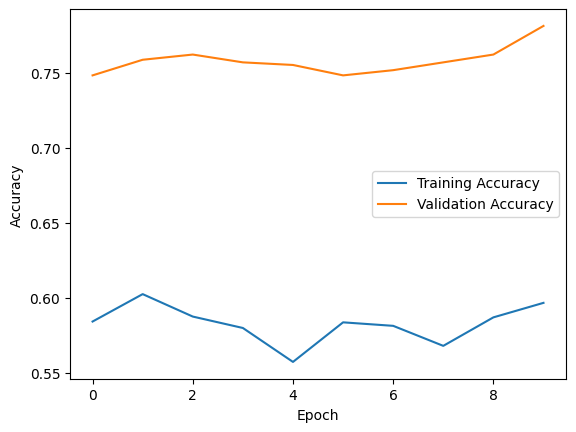

In [ ]:
# Train the model using the data generators
history = model.fit(
    train_data_generator,
    steps_per_epoch=len(images_train) // batch_size,
    epochs=10,  # Adjust as needed
    validation_data=val_data_generator,
    validation_steps=len(images_test) // batch_size,
)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the model
model.save('cnn_model.h5')

In [9]:
#move the file to drive (optional)

In [ ]:
import shutil

source_file = '/content/recog_cnn_model11.h5'
destination_folder = '/content/drive/My Drive/'

shutil.move(source_file, destination_folder)

'/content/drive/My Drive/recog_cnn_model11.h5'